In [41]:
# Imports the required packages for our analyses
import numpy as np
import scipy as sp
import scipy.io as SPO
from matplotlib import pyplot as plt
from sklearn.decomposition import FastICA, PCA

In [42]:
# plotting settings
plt.rcParams['figure.figsize'] = [20, 10]

In [43]:
pathIm = "/home/apadee/Downloads/BrainHack_Content/Data/RS_Imaging/"
pathBl = "/home/apadee/Downloads/BrainHack_Content/Data/Behavioral_Data/"
pathSt = "/home/apadee/Downloads/BrainHack_Content/Data/Structural_Data/"

In [44]:
# Functional activation over time
B = SPO.loadmat(pathIm + 'Data1_LR.mat');
C = SPO.loadmat(pathIm + 'Data1_RL.mat');

Data1 = B['Data1_LR'];
Data2 = C['Data1_RL'];
B = SPO.loadmat(pathIm + 'Data2_LR.mat');
C = SPO.loadmat(pathIm + 'Data2_RL.mat');
Data3 = B['Data2_LR'];
Data4 = C['Data2_RL'];
Data4 = Data4[:,:,1:]

In [45]:
# non filtered
B = SPO.loadmat(pathIm + 'Data1_LR_NF.mat');
C = SPO.loadmat(pathIm + 'Data1_RL_NF.mat');

Data1 = B['Data1_LR'];
Data2 = C['Data1_RL_NF'];
B = SPO.loadmat(pathIm + 'Data2_LR_NF.mat');
C = SPO.loadmat(pathIm + 'Data2_RL_NF.mat');
Data3 = B['Data2_LR_NF'];
Data4 = C['Data2_RL_NF'];
#Data4 = Data4[:,:,1:]

In [46]:
# Structural connectivity
A = SPO.loadmat(pathSt + 'A_Glasser.mat');
Adj = A['A_Glasser'];

In [47]:
labels = SPO.loadmat('/home/apadee/Downloads/labels_Glasser_DMN.mat');
print(labels['newlistDMN'].shape)
new_indices=labels['newlistDMN'].flatten()
new_indices=new_indices.astype(int)-1
print(new_indices.shape)

(30, 1)
(30,)


In [48]:
# Behavioral variables
D = SPO.loadmat(pathBl + 'Fluid.mat');
E = SPO.loadmat(pathBl + 'Crystal.mat');
F = SPO.loadmat(pathBl + 'Total.mat');

Fluid = D['Fluid']; #15 measures for 100 subjects
Crystal = E['Crystal'];
Total = F['Total']; #8 measures
#print(Fluid.shape, Crystal.shape, Total.shape)

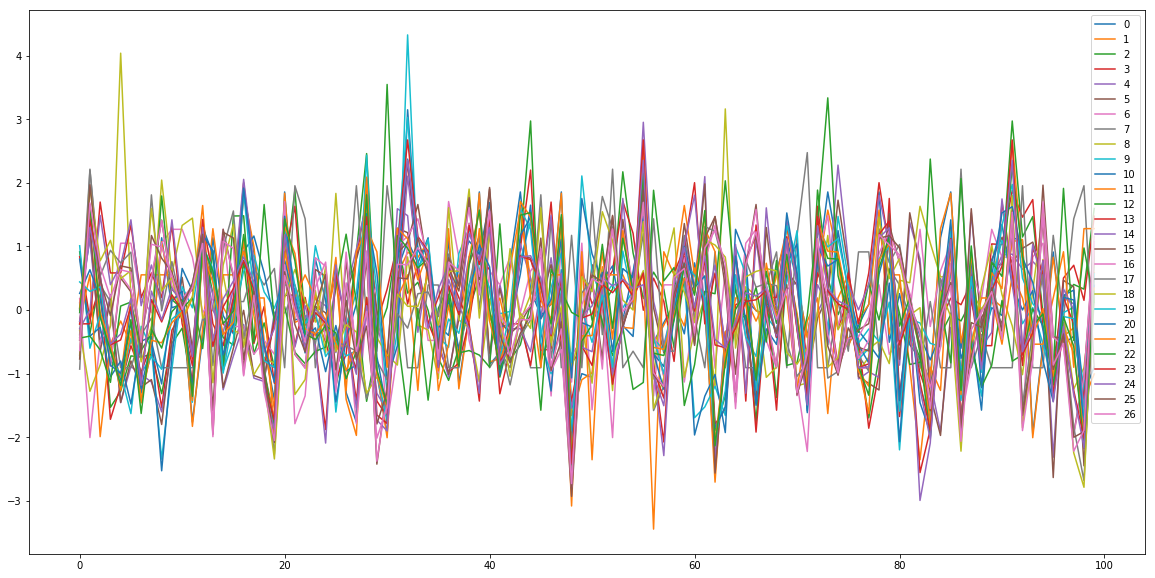

In [49]:
scores = np.concatenate((Fluid,Crystal,Total),axis=1)
#scores = Fluid
for i in range(0, scores.shape[1]):   
    scores[:,i] = (scores[:,i] - np.mean(scores[:,i]))/np.sqrt(np.var(scores[:,i]))
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
fig = plt.figure()
for i in range(0, scores.shape[1]):    
    plt.plot(scores[:,i], colors[(i)%len(colors)], label=str(i))
plt.legend()
plt.show()



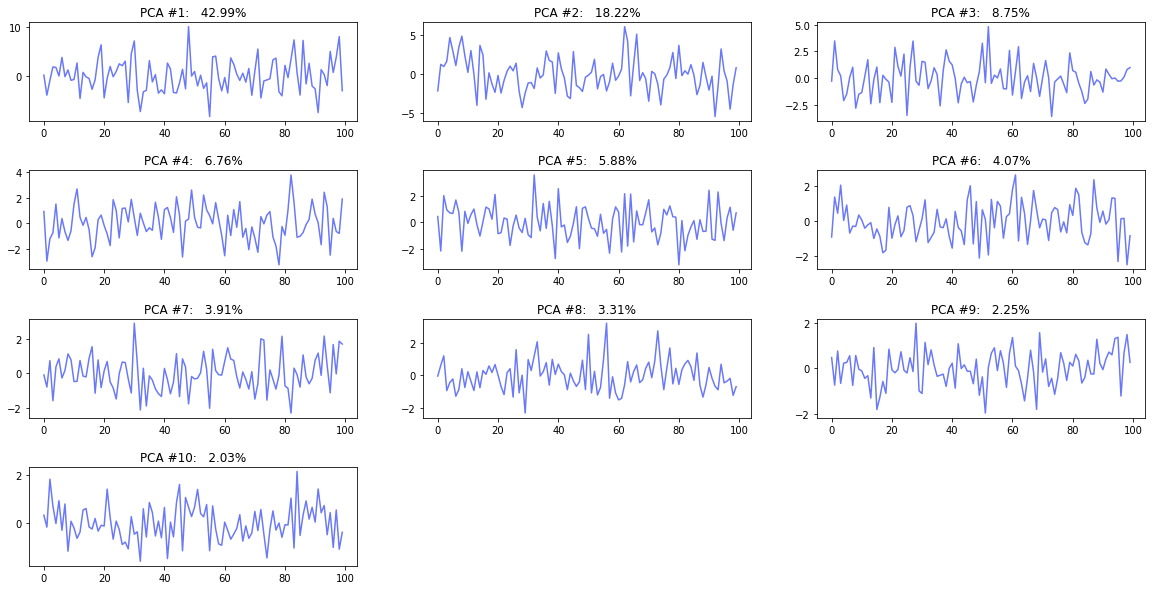

[34.06867949 22.18183245 15.36669171 13.51436823 12.59618125 10.48203775
 10.2786062   9.45043071  7.79225513  7.41102042]


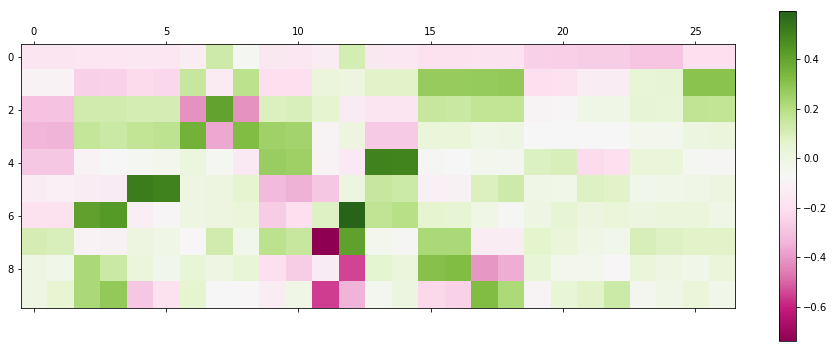

In [53]:
n_components = 10

pca = PCA(n_components=n_components)
pca_scores = pca.fit_transform(scores)  # estimate PCA sources

plt.figure()
plt.subplots_adjust(hspace=0.5)
for i in range(0, n_components):
    plt.subplot(int(n_components / 3) + n_components % 3, 3, i + 1)
    plt.plot(pca_scores[:, i], "xkcd:cornflower")
    plt.title("PCA #" + str(i + 1) + ":   " + str(round(pca.explained_variance_ratio_[i] * 100, 2)) + "%")
    plt.xlabel("")
    plt.ylabel("")
plt.show()
plt.matshow(pca.components_)
plt.set_cmap('PiYG')
plt.colorbar()
print(pca.singular_values_)

In [177]:
# 2. Graph Signal Processing

# Construction of the Laplacian matrix from the adjacency
D = np.zeros((360,360));

for i in range (0,360):
    D[i,i] = np.sum(Adj[:,i]);

# For a start, let us use the standard definition of the Laplacian
L = D - Adj;

# Eigendecomposition of the Laplacian
Sigma,V = np.linalg.eig(L);

# Sorts the results to arange the eigenmodes in increasing level of frequency
IDX = np.argsort(Sigma);

Sigma = Sigma[IDX];
V = V[:,IDX];

C = np.zeros((100,1190,360));

# For each time point and each subject, we can now extract a measure of strength of expression along the building blocks
for s in range (0,100):
    for t in range (0,1190):
        
        # Projection on each of the building blocks
        tmp_data = Data1[:,t,s];
        
        for b in range (0,360):
            C[s,t,b] = np.dot(tmp_data,V[:,b]);

# C contains the coefficients depicting, for each of the 360 eigenmodes, how strongly it is expressed
# at a given time point in the data





# Ideas for improved feature computations:
# - Consider averaged values of expression strength across the building blocks with lowest/highest spatial frequency
# - Consider statistical testing by comparison to e.g., phase-randomized data, to assess significant excursions


In [ ]:
# TO ADD: LINK WITH BEHAVIOUR